In [1]:
# %matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20)

import networkx as nx
import matplotlib.pyplot as plt
import pickle
import numpy as np
from skimage import data, io, filters
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage.filters import sobel
from skimage.morphology import watershed
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
import cv2
from scipy.misc import imread, imshow
from scipy.ndimage import label
from scipy import asarray, ones, vstack, hstack
from sys import stdout
import argparse

Populating the interactive namespace from numpy and matplotlib


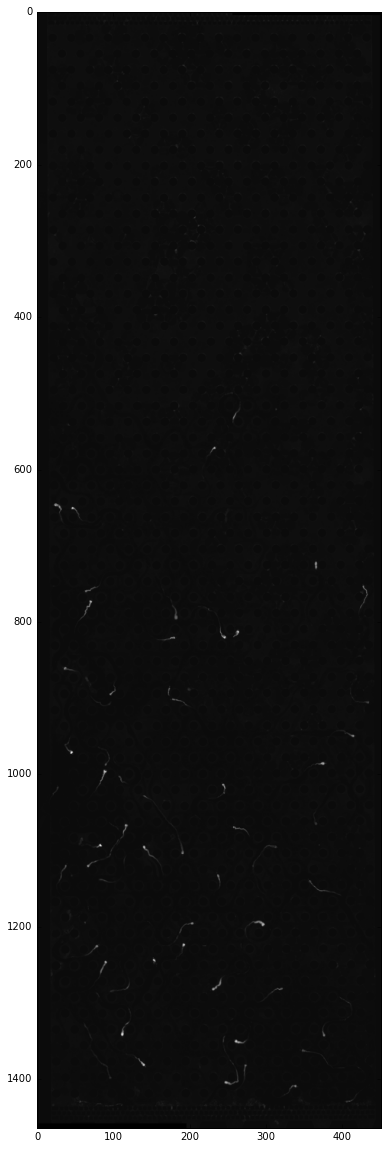

In [38]:
# filename = 'test.tif'
# filename = 'A06-t1-bf.tif'
filename = 'A06-t1-rfp.tif'
# filename = 'Merged t10.tif'
imf = io.imread(filename)
plt.imshow(imf,cmap='gray')

In [99]:
# # initialize the list of reference points and boolean indicating
# # whether cropping is being performed or not
# refPt = []
# cropping = False
 
# def click_and_crop(event, x, y, flags, param):
#     # grab references to the global variables
#     global refPt, cropping

#     # if the left mouse button was clicked, record the starting
#     # (x, y) coordinates and indicate that cropping is being
#     # performed
#     if event == cv2.EVENT_LBUTTONDOWN:
#         refPt = [(x, y)]
#         cropping = True

#     # check to see if the left mouse button was released
#     elif event == cv2.EVENT_LBUTTONUP:
#         # record the ending (x, y) coordinates and indicate that
#         # the cropping operation is finished
#         refPt.append((x, y))
#         cropping = False

#         # draw a rectangle around the region of interest
#         cv2.rectangle(image, refPt[0], refPt[1], (0, 255, 0), 2)
#         cv2.imshow("image", image)
    

# # # construct the argument parser and parse the arguments
# # ap = argparse.ArgumentParser()
# # ap.add_argument("-i", "--image", required=True, help="Path to the image")
# # args = vars(ap.parse_args())

# # # load the image, clone it, and setup the mouse callback function
# # image = cv2.imread(args["image"])
# # clone = image.copy()
# # cv2.namedWindow("image")
# # cv2.setMouseCallback("image", click_and_crop)

# # load the image, clone it, and setup the mouse callback function
# image = cv2.imread(filename)
# clone = image.copy()
# cv2.namedWindow("image")
# cv2.setMouseCallback("image", click_and_crop)

# # keep looping until the 'q' key is pressed
# while True:
#     # display the image and wait for a keypress
#     cv2.imshow('image', image)
#     key = cv2.waitKey(1) & 0xFF

#     # if the 'r' key is pressed, reset the cropping region
#     if key == ord("r"):
#         image = clone.copy()

#     # if the 'c' key is pressed, break from the loop
#     elif key == ord("c"):
#         break

# # if there are two reference points, then crop the region of interest
# # from teh image and display it
# if len(refPt) == 2:
#     roi = clone[refPt[0][1]:refPt[1][1], refPt[0][0]:refPt[1][0]]
#     cv2.imshow("ROI", roi)
#     cv2.waitKey(0)

# # close all open windows
# cv2.destroyAllWindows()

In [39]:
x0 = 10
xf = 1420
y0 = 20
yf = 430

In [40]:
def ROI(image, x1,x2,y1,y2):
    roi_image = image[x1:x2,y1:y2]
    return roi_image

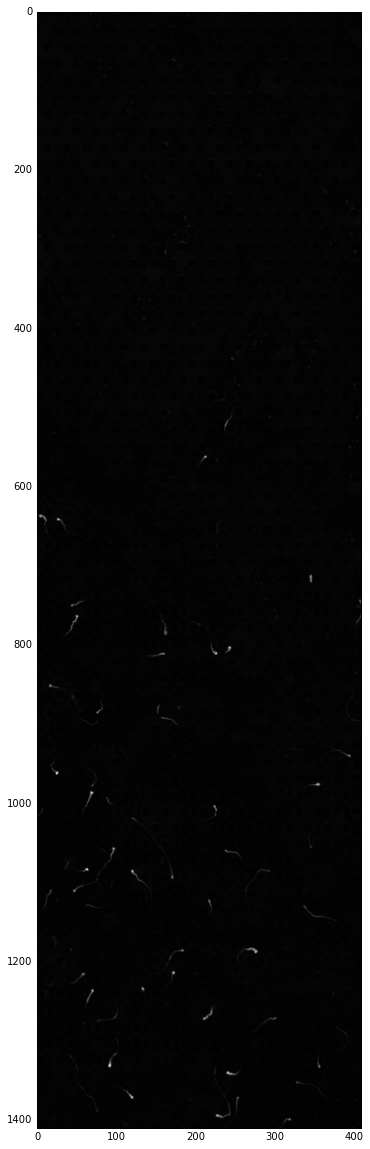

In [41]:
roi_image = ROI(imf,x0,xf,y0,yf)
plt.imshow(roi_image, cmap='gray')

In [72]:
def basics(roi_fname):
    worm = roi_fname
    blur = cv2.blur(worm,(1,1))
    elevation_map = sobel(blur)
    plt.figure(1)
    plt.imshow(elevation_map[1300:,200:300])
    print elevation_map[50,25]
    print elevation_map[1375,220]
    plt.figure(2)
    plt.imshow(elevation_map)
    thresh = threshold_otsu(blur)
    bw = closing(worm > thresh, square(3))
    plt.figure(3)
    plt.imshow(bw, cmap='gray', interpolation='nearest')
    markers = np.zeros_like(blur)
    markers[worm > thresh] = 1
    markers[worm < thresh] = 2
    segmentation = watershed(elevation_map, markers)
    plt.figure(7)
    plt.imshow(segmentation, cmap = 'gray', interpolation='nearest')
    markers2 = np.zeros_like(blur)
    markers2[worm > thresh] = 2
    markers2[worm < thresh] = 1
    segmentation2 = watershed(elevation_map, markers2)
    plt.figure(8)
    plt.imshow(segmentation2, interpolation='nearest')
    return bw

0.000309089370549
0.00037798817955


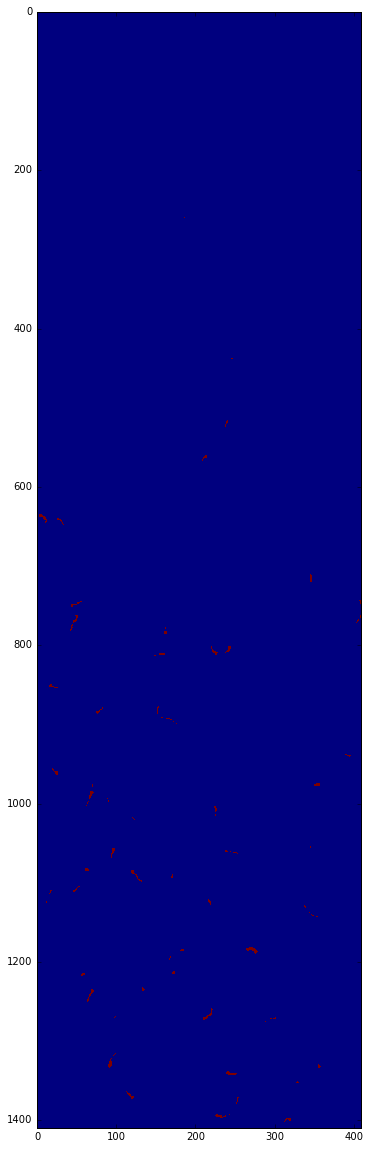

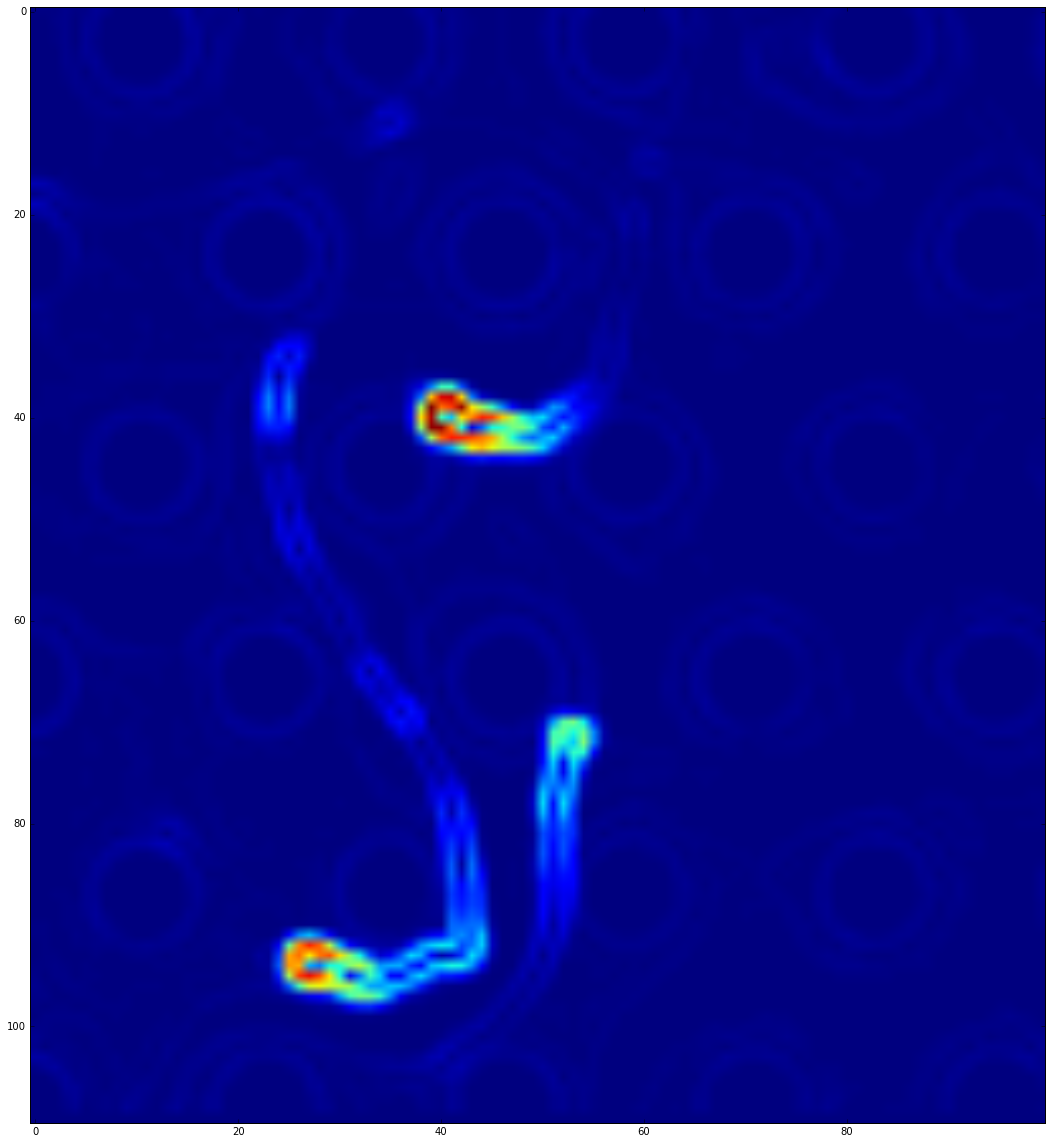

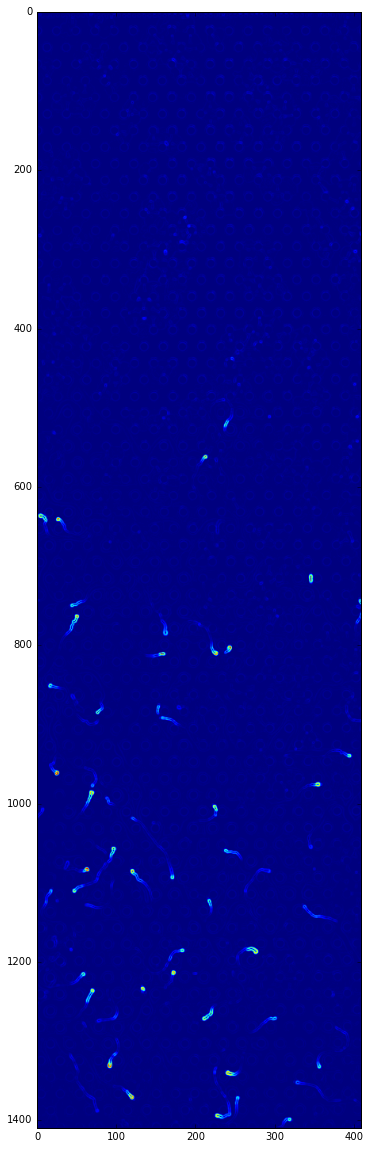

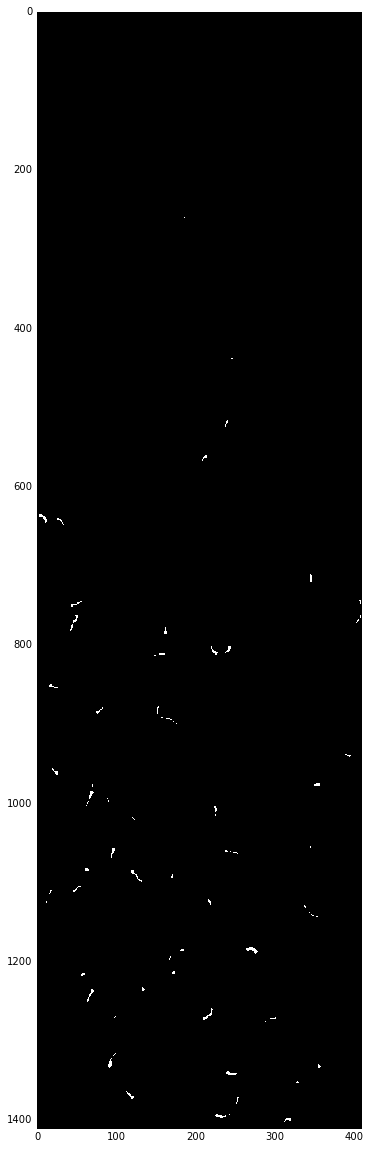

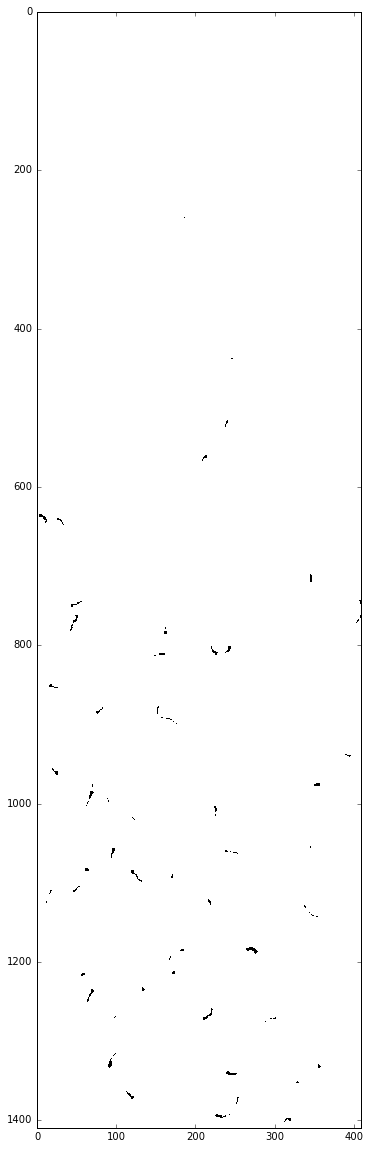

In [73]:
segmentedImage = basics(roi_image)

[[1 1 1 ..., 1 0 0]
 [1 1 1 ..., 1 0 0]
 [1 1 1 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]
(array([], dtype=int64), array([], dtype=int64))


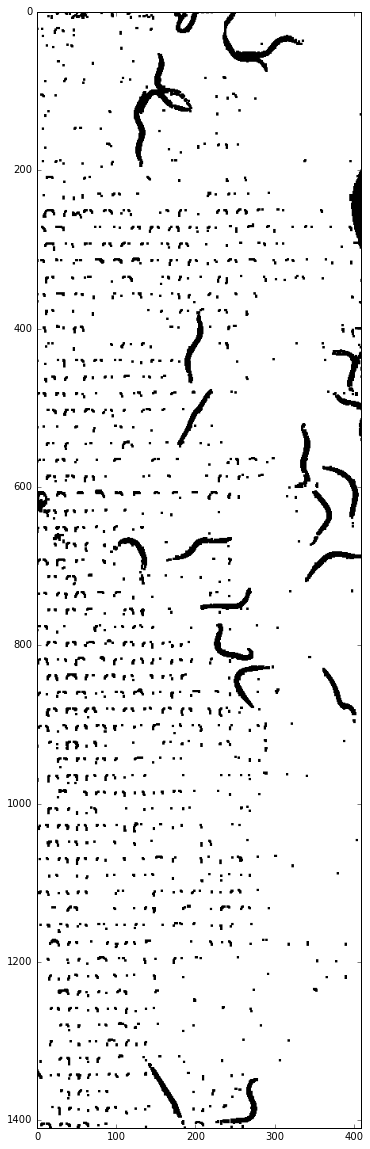

In [34]:
plt.imshow(segmentedImage, cmap = 'gray')
print segmentedImage.astype(int)
print np.where(segmentedImage>1)

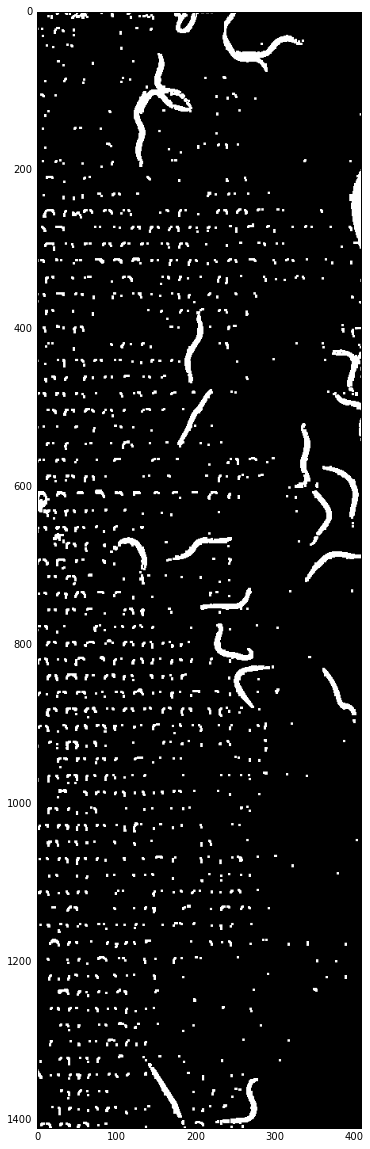

In [35]:
markers = np.zeros_like(segmentedImage)
markers[segmentedImage == 0] = 1
markers[segmentedImage == 1] = 0
plt.imshow(markers, cmap = 'gray')

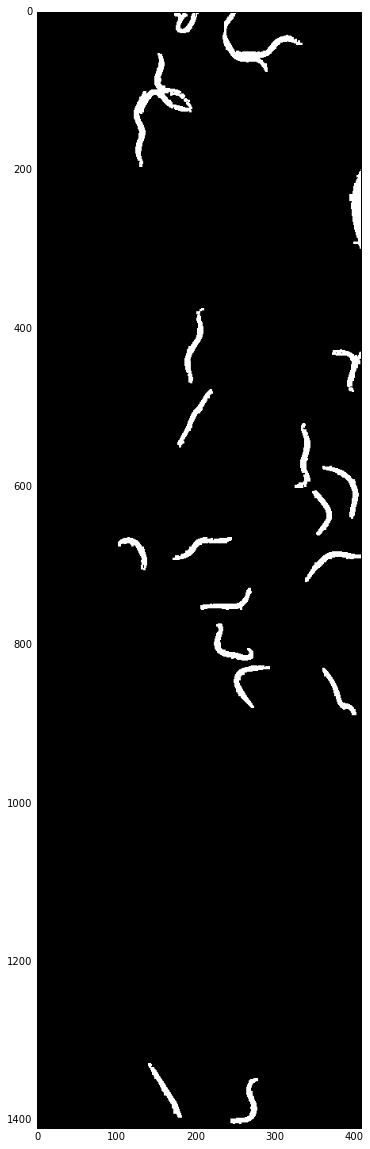

In [36]:
im_labeled, n_labels = label(markers)
plt.imshow(im_labeled)
sizes = np.bincount(im_labeled.ravel())
mask_sizes = sizes > 400
mask_sizes[0] = 0
worms_cleaned = mask_sizes[im_labeled]
# plt.imshow(label_objects)
plt.imshow(worms_cleaned, cmap='gray')

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
19


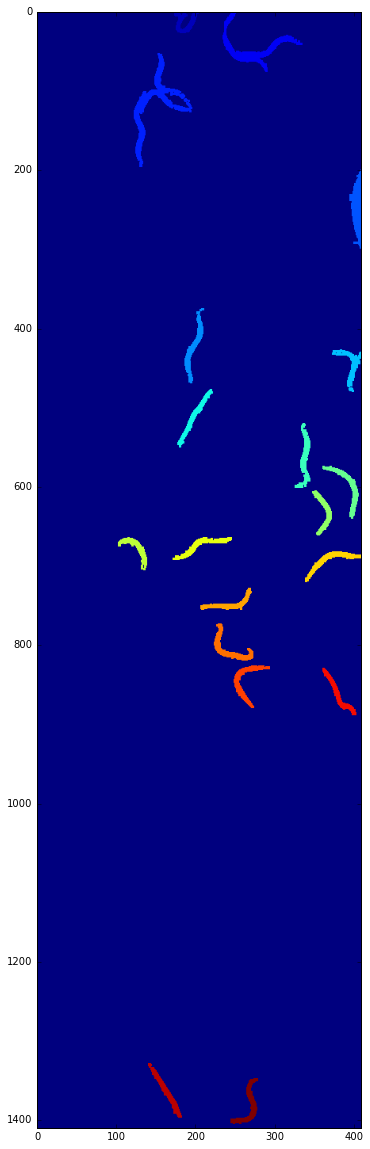

In [37]:
labeled2, n2 = ndi.label(worms_cleaned)
print labeled2
print n2
plt.imshow(labeled2)